In [1]:
import torch
from torch import nn

C_in = 3
C_out = 14
W = 2
H = 4
model = nn.Conv2d(in_channels=C_in, out_channels=C_out, kernel_size=(1, 1))  # Does Linear(C_in, C_out) up to transpose

In [2]:
for k, v in model.named_parameters():
    print(k, v.shape)

weight torch.Size([14, 3, 1, 1])
bias torch.Size([14])


In [3]:
for k, v in nn.Linear(C_in, C_out).named_parameters():
    print(k, v.shape)

weight torch.Size([14, 3])
bias torch.Size([14])


In [4]:
X = torch.randn((C_in, W, H))

In [5]:
model.weight.shape

torch.Size([14, 3, 1, 1])

In [6]:
model.weight.squeeze().shape

torch.Size([14, 3])

In [7]:
(model.weight.squeeze() @ X.reshape(C_in, -1) + model.bias.reshape(-1, 1)).shape

torch.Size([14, 8])

In [8]:
model(X).shape

torch.Size([14, 2, 4])

In [9]:
model(X).reshape(-1, W * H) == model.weight.squeeze() @ X.reshape(C_in, -1) + model.bias.reshape(-1, 1)

tensor([[True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True]])

In [10]:
model2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(W, H))  #　Does Linear(W * H, 1) up to flatten

In [11]:
for k, v in model2.named_parameters():
    print(k, v.shape)

weight torch.Size([1, 1, 2, 4])
bias torch.Size([1])


In [12]:
for k, v in nn.Linear(W * H, 1).named_parameters():
    print(k, v.shape)

weight torch.Size([1, 8])
bias torch.Size([1])


In [13]:
import numpy as np

np.eye(7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

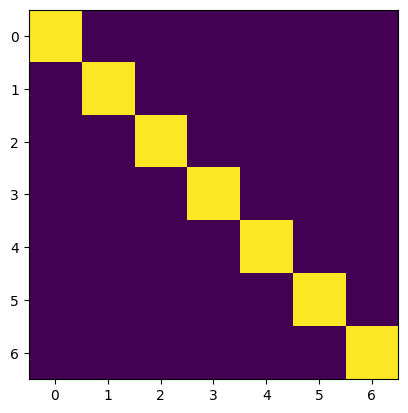

In [14]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(np.eye(7))

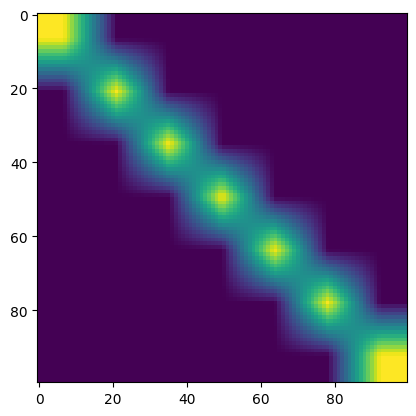

In [15]:
plt.imshow(cv2.resize(np.eye(7), (100, 100)))